In [1]:
pip install pandas scikit-learn matplotlib seaborn

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

In [29]:

uploaded = files.upload()
df = pd.read_csv("heart.csv")  # Replace 'heart.csv' with your actual file name
print(df.head())

Saving heart.csv to heart (4).csv
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64


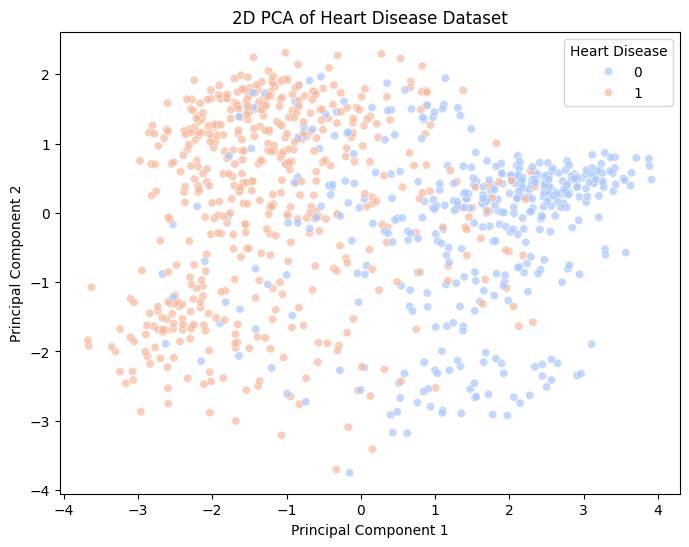

Explained Variance Ratio: [0.22586656 0.11008684]


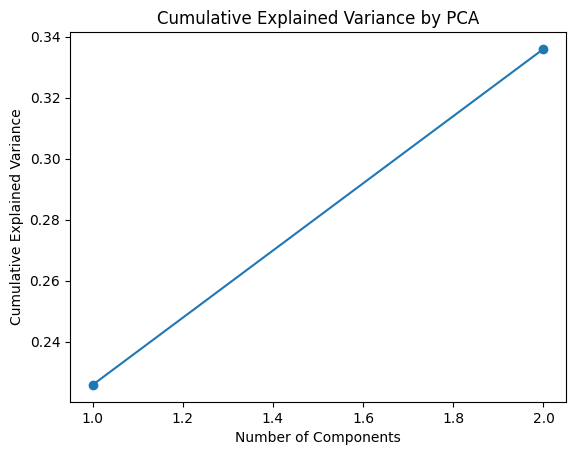

In [39]:
print(df.isnull().sum())
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# One-hot encode the categorical columns (e.g., ChestPainType, if applicable)
df = pd.get_dummies(df, drop_first=True)  # This creates binary columns for categorical data
# print(df.columns)

# print(df['Sex_M'].unique())  # Check unique values in the 'Sex' column
# print(df['Sex_M'].head())  # Preview the first few rows of the 'Sex' column

# Alternatively, use label encoding for binary features (e.g., Sex)

encoder = LabelEncoder()
df['Sex_M'] = encoder.fit_transform(df['Sex_M'])


# Separate the target variable (HeartDisease) from the feature variables
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Initialize PCA with 2 components (2D projection)
pca = PCA(n_components=2)

# Fit and transform the standardized data
X_pca = pca.fit_transform(X_scaled)

# Convert the result into a DataFrame for easy handling
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['HeartDisease'] = y  # Adding the target variable for visualization

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df, palette='coolwarm', alpha=0.7)
plt.title('2D PCA of Heart Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', loc='best')
plt.show()


# Print the explained variance ratio of the components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


# Plot cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()